# Basic topographic features

*This lesson made by Simon M Mudd and last updated 30/09/2021*

In this lesson we are going to download some data and look at basic features of channels and river basins. 

*LESSON SHORTCUT*

If you want to run a full analysis of a place of your choosing just modify the 

## First import some stuff we need

In [5]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw
import pandas as pd
import geopandas as gpd
import cartopy as cp
import cartopy.crs as ccrs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

## Grab some data

First, we need to grab some data. We use a tool in `lsdviztools.lsdbasemaptools` called the `ot_scraper` (`ot` is for opentopography.org).

We want to make sure the `ot_scraper` is up to date, so use the following command to update the `lsdviztools` package. 

In [3]:
!pip install lsdviztools --upgrade

Below is some code for grabbing data from opentopography. It uses the syntax:

`DEM_name = bmt.ot_scraper(parameters=...)`

where you need to give it some paramaters. These are things like what sort of data you want (most people will use the SRTM 30 metre data) and you also tell it the lower left and the upper right corners, using latitude and longitude. You can get these from goole earth by right clicking on the map and selecting "what's here". 

In this example I use the Rio Aguas in southern Spain. 

In [6]:
Aguas_DEM = bmt.ot_scraper(source = "SRTM30",
                           longitude_W = -2.318307057720176, longitude_E = -1.8425313329873874, 
                           latitude_S = 36.990554387425014, latitude_N = 37.23367133834253,
                           prefix = "rio_aguas") 
Aguas_DEM.print_parameters()
Aguas_DEM.download_pythonic()

The source is: SRTMGL1
The west longitude is: -2.318307057720176
The east longitude is: -1.8425313329873874
The south latitude is: 37.23367133834253
The north latitude is: 36.990554387425014
The path is: ./
The prefix is: rio_aguas
The resolution is: 30
I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=36.990554387425014&north=37.23367133834253&west=-2.318307057720176&east=-1.8425313329873874&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
The filename will be:
./rio_aguas_SRTMGL1.tif
The path and file without path are:
./  rio_aguas_SRTMGL1.tif
Finished downloading


('./rio_aguas_SRTMGL1.tif', './', 'rio_aguas_SRTMGL1.tif')

We need to convert this data into a format that can be understood by *lsdtopotools*, which is a topographic analysis package developed at the University of Edinburgh. 

In [7]:
DataDirectory = "./"
RasterFile = "rio_aguas_SRTMGL1.tif"
gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=30)

The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
And some extra projection information strings:
None
WGS 84
The centre of the raster is at:
(-2.1969444444208994, 36.99583333333029)
dem_data.width is: 1713
The latitude and longitude is
36.99583333333029 -2.1969444444208994
res tuple is:
(30, 30)
The destination CRS is: EPSG:32630
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 1419, 'height': 913, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(30.0, 0.0, 560453.91583896,
       0.0, -30.0, 4121430.9659980484)}
Removing pixels with an elevation less than 0.01


'rio_aguas_SRTMGL1_UTM.bil'

# Now lets do some basic topographic analysis

For this to work you need *lsdtopotools* installed on your system. But if you are using either Edinburgh's noteable service or the *lsdtopotools* docker container, it is already installed. If you are not using one of these, you will need to install it using conda (see *lsdtopotools* installation instructions. 

We will extract some topogaphic metrics using `lsdtopotools`. 

The `lsdtt_parameters` are the various parameters that you can use to run an analysis. We will discuss these later. For now, we will just follow this recipe. 

In [8]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "60",
                    "print_slope" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "rio_aguas_SRTMGL1_UTM",
                                 write_prefix= "rio_aguas_SRTMGL1_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: rio_aguas_SRTMGL1_UTM
The write prefix is: rio_aguas_SRTMGL1_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'surface_fitting_radius': '60', 'print_slope': 'true'}


In [9]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| https://www.doi.org/10.5281/zenodo.2560223          ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can read the documentation at:                  ||
I have one argument. I don't know if this is a directory path
or a driver filename. I am going 

# Plot some data

We are now going to do some simple plots using a mapping package that we put together. There are more general ways to visualise data, but this makes pretty pictures quickly.  

Your colourbar will be located: right
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 560453.0 and y: 4094040.0
I made the ticks.
x labels are: 
['568', '576', '584', '592', '600']
x locations are:
[568000.0, 576000.0, 584000.0, 592000.0, 600000.0]
y labels are: 
['4102', '4110', '4118']
y locations are:
[4102000.0, 4110000.0, 4118000.0]
This colourmap is: gray


/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:423: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2


/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:1169: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im,cmap=BaseRaster._colourmap,spacing='uniform', orientation=self.colourbar_orientation,cax=ax_list[-1],drawedges=False)
findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


The aspect ratio is: 1.5542168674698795
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '']
The longest colourbar label has 0 characters.
The cbar characters are: 0 and the cbar text width is: 0.4
cbar_left: 5.449999999999999 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 3.7453488372093022]
Map axes are:
[0.136, 0.1735485873952189, 0.72, 0.773051847252406]
cbar_axes are:
[0.8719999999999999, 0.1735485873952189, 0.032, 0.773051847252406]
Number of axes are: 2
I'm returning:
Figure(450x269.665)


<Figure size 432x288 with 0 Axes>

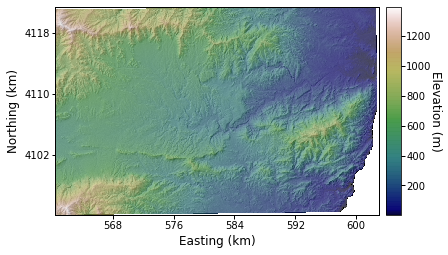

In [10]:
%matplotlib inline
Base_file = "rio_aguas_SRTMGL1_UTM"
DataDirectory = "./"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology")

Your colourbar will be located: right
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 560453.0 and y: 4094040.0
I made the ticks.
x labels are: 
['568', '576', '584', '592', '600']
x locations are:
[568000.0, 576000.0, 584000.0, 592000.0, 600000.0]
y labels are: 
['4102', '4110', '4118']
y locations are:
[4102000.0, 4110000.0, 4118000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
custom min and max are:
0
1.25
I am setting customisable colourbar minimum and maximum values: 0,1.25
The number of axes are: 2
The aspect ratio is: 1.5542168674698795
I need to adjust the spacing of the colourbar.
You have a colourbar on the lef

<Figure size 432x288 with 0 Axes>

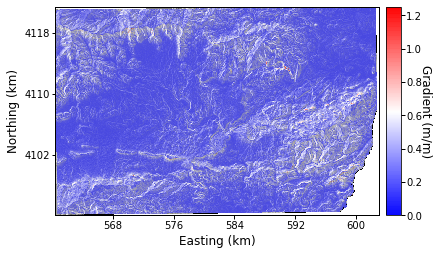

In [12]:
Base_file = "rio_aguas_SRTMGL1_UTM"
Drape_prefix = "rio_aguas_SRTMGL1_UTM_SLOPE"
DataDirectory = "./"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, 
                              cmap = "bwr", cbar_loc = "right", 
                              cbar_label = "Gradient (m/m)",
                              save_fig=False, size_format="geomorphology",
                              colour_min_max = [0,1.25])

# Get some channel profiles

Okay, we will now run a different analysis. We will get some channel profiles. 

In [15]:
lsdtt_parameters = {"print_basin_raster" : "true",
                    "print_chi_data_maps" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "rio_aguas_SRTMGL1_UTM",
                                 write_prefix= "rio_aguas_SRTMGL1_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: rio_aguas_SRTMGL1_UTM
The write prefix is: rio_aguas_SRTMGL1_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'print_chi_data_maps': 'true'}


In [16]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| https://www.doi.org/10.5281/zenodo.2560223          ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can read the documentation at:                  ||
I have one argument. I don't know if this is a directory path
or a driver filename. I am going 

The filename is ./rio_aguas_SRTMGL1_UTM_AllBasins.bil
Finished with exporting basins!
I am going to print some simple chi data maps for visualisation.
These data maps are also useful for visualising channel networks and making channel profiles.
Finished with basins
Done with channel extraction
I'm all finished! Have a nice day.


We can look to see what files we have using the following command. the `!` tells this notebook to run a command on the underlying linux operating system, and `ls` in linux is a command to list files. 

In [17]:
!ls

Lesson_01_basic_topographic_features.ipynb
Test_01.driver
rio_aguas_SRTMGL1.tif
rio_aguas_SRTMGL1_UTM.bil
rio_aguas_SRTMGL1_UTM.bil.aux.xml
rio_aguas_SRTMGL1_UTM.hdr
rio_aguas_SRTMGL1_UTM.tif
rio_aguas_SRTMGL1_UTM_AllBasins.bil
rio_aguas_SRTMGL1_UTM_AllBasins.hdr
rio_aguas_SRTMGL1_UTM_AllBasinsInfo.csv
rio_aguas_SRTMGL1_UTM_SLOPE.bil
rio_aguas_SRTMGL1_UTM_SLOPE.bil.aux.xml
rio_aguas_SRTMGL1_UTM_SLOPE.hdr
rio_aguas_SRTMGL1_UTM_chi_data_map.csv
rio_aguas_SRTMGL1_UTM_hs.bil
rio_aguas_SRTMGL1_UTM_hs.bil.aux.xml
rio_aguas_SRTMGL1_UTM_hs.hdr
rio_aguas_SRTMGL1_UTM_ingestedParam.param


The file with the channels is the one with `chi_data_map` in the filename. We are going to load this into a `pandas` dataframe. You can think of `pandas` as a kind of excel for python. It does data handling of spreadsheet-like information (and loads more.)

In [20]:
df = pd.read_csv("rio_aguas_SRTMGL1_UTM_chi_data_map.csv")
df.head()

,latitude,longitude,chi,elevation,flow_distance,drainage_area,source_key,basin_key
0,37.137025,-2.279653,9.0250,700.0,67779.0,901800.0,0,0
1,37.137023,-2.279315,8.9934,700.0,67749.0,941400.0,0,0
2,37.136751,-2.278980,8.9497,699.0,67706.0,943200.0,0,0
3,37.136478,-2.278645,8.9060,696.0,67664.0,948600.0,0,0
4,37.136206,-2.278309,8.8624,693.0,67621.0,955800.0,0,0


In [21]:
%matplotlib inline
fname_prefix = "rio_aguas_SRTMGL1_UTM"
ChannelFileName = "rio_aguas_SRTMGL1_UTM_chi_data_map.csv"
DataDirectory = "./"
lsdmw.PrintChiChannelsAndBasins(DataDirectory,fname_prefix, ChannelFileName, 
                                add_basin_labels = True, cmap = "jet", cbar_loc = "right", 
                                size_format = "ESURF", fig_format = "png", 
                                dpi = 250,plotting_column = "elevation")

Basin keys are: 
[0, 1]
I'm going to make the basin plots. Your topographic data must be in ENVI bil format or I'll break!!
rio_aguas_SRTMGL1_UTM_AllBasins.bil
rio_aguas_SRTMGL1_UTM_AllBasins.bil
Let me grab the coordinate reference system.
EPSG:32630
Whoops. Found a repeated ID. Getting rid of the smaller one.
Found a repeated ID. Keeping the one with area of 523359000.0
I need to convert the crs to wkt format so it is resistant to stupid proj errors.
ID is: 129.0
ID is: 478.0
The object file prefix is: rio_aguas_SRTMGL1_UTM_chi_data_map
Loading your file from csv
done
I am selecting your data for specific basin_key
I am showing the basins without text labels.
Your colourbar will be located: None
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 560453.0 and y: 4094040.0
I made the ticks.
x labels are: 
['568', '576', '584', '592', '600']
x locations are:
[568000.0, 576000.0, 584000.0, 592000.

/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:423: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


Let me grab the coordinate reference system.
EPSG:32630
Whoops. Found a repeated ID. Getting rid of the smaller one.
Found a repeated ID. Keeping the one with area of 523359000.0
I need to convert the crs to wkt format so it is resistant to stupid proj errors.
ID is: 129.0
ID is: 478.0
The number of basins are: 2
The number of points are: 2
Plotting the polygons, colouring by basin...
129.0 129
478.0 478
I am going to plot some points for you. The EPSG string is:EPSG:32630
pointtools GetUTMEastingNorthing, getting the epsg string: EPSG:32630
WARNING you must have a recent (>=6) version of proj and pyproj (>=2.4) for this to work 
EPSG:32630
I got the easting and northing
I got the data column you wanted
I have taken the log your colour data, the minimum is 0.6992305028834092 and the maximum is 2.975431808509263
I also got the data for scaling, which is in column drainage_area
The size of the array is: 
(17072,)
I am going to convert data to log for point scaling.
I logged (is it a verb

/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:1308: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(sc,cmap=cmap, orientation=self.colourbar_orientation,cax=ax_list[-1])


<Figure size 432x288 with 0 Axes>

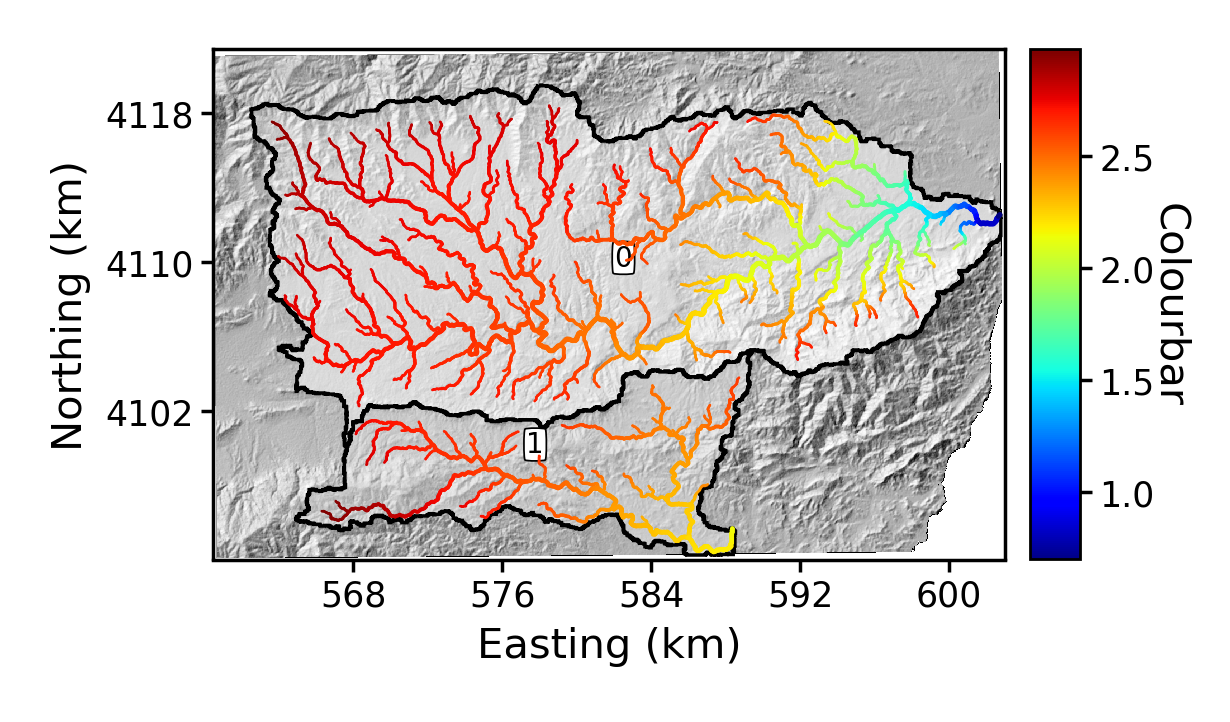

In [22]:
from IPython.display import Image
Image('rio_aguas_SRTMGL1_UTM_chi_channels_and_basins.png')

In [23]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf.set_crs(epsg=4326)
print(gdf.head())

gdf2 = gdf.to_crs("EPSG:32610")

gdf_b1 = gdf2[(gdf2['basin_key'] == 0)]
print(gdf_b1.head())

    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  37.137025  -2.279653  9.0250      700.0        67779.0       901800.0   
1  37.137023  -2.279315  8.9934      700.0        67749.0       941400.0   
2  37.136751  -2.278980  8.9497      699.0        67706.0       943200.0   
3  37.136478  -2.278645  8.9060      696.0        67664.0       948600.0   
4  37.136206  -2.278309  8.8624      693.0        67621.0       955800.0   

   source_key  basin_key                   geometry  
0           0          0  POINT (-2.27965 37.13703)  
1           0          0  POINT (-2.27931 37.13702)  
2           0          0  POINT (-2.27898 37.13675)  
3           0          0  POINT (-2.27864 37.13648)  
4           0          0  POINT (-2.27831 37.13621)  
    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  37.137025  -2.279653  9.0250      700.0        67779.0       901800.0   
1  37.137023  -2.279315  8.9934      700.0        67749.0       941

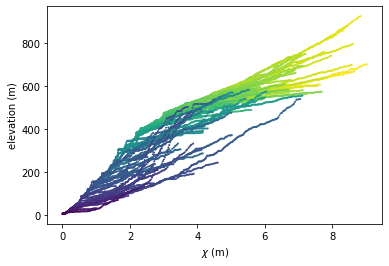

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gdf_b1.chi,gdf_b1.elevation,c=gdf_b1.flow_distance,s=1)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")
fig.show()

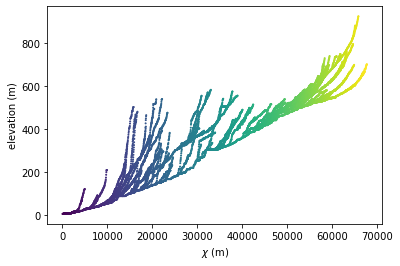

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gdf_b1.flow_distance,gdf_b1.elevation,c=gdf_b1.flow_distance,s=1)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")
fig.show()